# Stock Market Prediction

## Mohammad Wasiq

# Stock Prices Prediction Using LSTM:

This case study/project is used to predict the stock prices using LSTM (long short term memory). LSTM is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems.

* Steps to be done:

1. We will collect the Stock Data 
2. Pre-process the Data 
3. Create an stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future and plot the output



In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## A. Pre-processing:

We will load the data for the specified company and date range which includes company stock symbol, starting/ending date for the data.

    :param company: The company's stock symbol (str)
    :param start: The starting date for the data range (str or datetime)
    :param end: The ending date for the data range (str or datetime)
    :return: A dataframe containing the relevant stock data (pandas.DataFrame)

In [2]:
# Load csv
df = pd.read_csv('../input/cac40-stocks-dataset/preprocessed_CAC40.csv', parse_dates=['Date'])

In [3]:
def load_data(company, start, end):
    
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Name == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    dataframe = dataframe.rename(columns = {'Closing_Price': 'Close'})
    return dataframe

In [4]:
COMPANY = 'Accor'
START_DATE = dt.datetime(2015,1,1)
END_DATE = dt.datetime(2020,1,1)

START_DATE_TEST = END_DATE

In [5]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [6]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [7]:
# Set the number of days used for prediction
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## B. LSTM Model:

What is a LSTM ?

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [8]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))
    
    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

## C. Training LSTM model:

In this section we will train LSTM model.

In [9]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [10]:
# Callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5', 
    verbose = 2, 
    save_best_only = True
)

model.fit(
    x_train, 
    y_train, 
    epochs=25, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
38/38 [==============================] - 11s 90ms/step - loss: 0.0495
Epoch 2/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0114
Epoch 3/25
38/38 [==============================] - 3s 91ms/step - loss: 0.0094
Epoch 4/25
38/38 [==============================] - 3s 91ms/step - loss: 0.0091
Epoch 5/25
38/38 [==============================] - 4s 99ms/step - loss: 0.0094
Epoch 6/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0077
Epoch 7/25
38/38 [==============================] - 4s 94ms/step - loss: 0.0077
Epoch 8/25
38/38 [==============================] - 4s 94ms/step - loss: 0.0075
Epoch 9/25
38/38 [==============================] - 4s 94ms/step - loss: 0.0071
Epoch 10/25
38/38 [==============================] - 3s 92ms/step - loss: 0.0071
Epoch 11/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0071
Epoch 12/25
38/38 [==============================] - 4s 94ms/step - loss: 0.0067
Epoch 13/25
38/38 [=================

## D. Inference:

In this step we will load the test data for the specified company and date range. Followed by:

* Extracting the actual closing prices from the test data.
* Concatenating the training and test data along the 'Close' column.
* Extracting the relevant portion of the dataset for model inputs.
* Reshaping the model inputs to a 2D array with a single column.
* Applying the same scaling used for training data to the model inputs.


In [11]:
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,   # Load test data for the specified company and date range
    end=dt.datetime.now()
)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

* Next steps is to initilize an empty list for test data input, followed by iterating through the model inputs (starting from the prediction_days index) and appending the previous 'prediction_days' values to x_test, then, we will convert x_test list to a numpy array as well as reshaping x_test to a 3D array with the appropriate dimensions for the LSTM model. Going ahead, we will generate price predictions using the LSTM model and inverting the scaling applied to the predicted prices to obtain actual values.

In [12]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)  # Converting the x_test list to a numpy array
 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)  # Generate price predictions using the LSTM model

predicted_prices = scaler.inverse_transform(predicted_prices)

3/3 [==============================] - 1s 21ms/step


* Data visualization:
  
  1. Plotting the Actual prices using a black line.
  2. Plotting the predicted prices using a green line.
  3. Set the title of the plot using the company name, name the x-axis as 'time' and, y-axis is the company's name.
  4. Display the plot on the screen and a legend to differentiate between the actual and predicted prices.
  

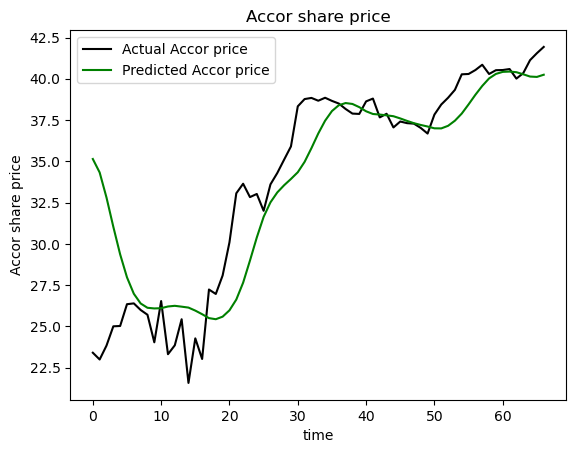

In [13]:
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price") #1

plt.plot(predicted_prices, color='green', label=f"Predicted {COMPANY} price") #2

plt.title(f"{COMPANY} share price")
plt.xlabel("time")                    #3
plt.ylabel(f"{COMPANY} share price")

plt.legend()    #4
plt.show()

In [14]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
Prediction: 40.519203186035156


## 5. References:

* Used the datasets mentioned below:
    1. CAC40 Dataset
    2. S&P 500 stock data 
    3. NSE Stocks Data
    4. Huge Stock Market Dataset
    5. ibovespa-stocks

For more information on LSTM model: [LSTM model](https://www.geeksforgeeks.org/long-short-term-memory-networks-explanation/)